<a href="https://colab.research.google.com/github/JuanBarbosa277/Proyecto-Final-IA/blob/main/RedNeuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
 
data_set = pd.read_csv("citrus.csv")
 
 
 
 
Y_total = data_set.values[:,0];
 
 

Y_total[Y_total[:] == 'orange'] = 1
Y_total[Y_total[:] == 'grapefruit'] = 0
 
Y_total=Y_total.astype('int')
 
 
X_total = data_set.values[:, 1:5]
 
#Partición de datos --> 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X_total, Y_total, test_size=0.3, random_state=0)
 
#escalización de datos de entrenamiento
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

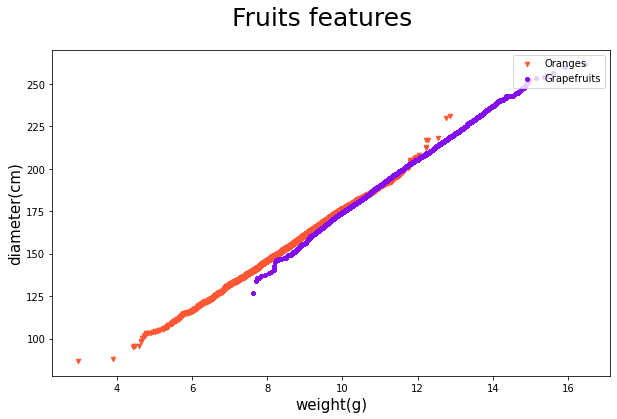

In [2]:
  
oranges_d=[]
oranges_w=[]

gfruits_d=[]
gfruits_w=[]
 
for i in np.arange(0,Y_total.size,1):
    if Y_total[i]==1:
        oranges_d.append(X_total[i,0])
        oranges_w.append(X_total[i,1])
    else:
        gfruits_d.append(X_total[i,0])
        gfruits_w.append(X_total[i,1])
         
fig = plt.figure(figsize=(10,6))
fig.suptitle('Fruits features', fontsize=25)
ax = fig.add_subplot(111)

no_of_preds = len(oranges_d) + len(gfruits_d)

ax.scatter(oranges_d,oranges_w, s=20, c='#FF5733', marker="v", label='Oranges')
ax.scatter(gfruits_d,gfruits_w, s=20, c='#830CF3', marker="P", label='Grapefruits')

  
plt.legend(loc='upper right');
  
ax.set_xlabel('weight(g)', fontsize=15)
ax.set_ylabel('diameter(cm)', fontsize=15)
  
plt.show()

In [4]:
from sklearn.neural_network import MLPClassifier
"""
ref=-1
MCC=0
ACC=0
for i in range(1,10):
  for j in range(1,10):
    clf=MLPClassifier(hidden_layer_sizes=(j,i),activation='relu',random_state=1, max_iter=1500, verbose=False)
    clf.fit(X_train,y_train)
    y_test_predicted_ANN=clf.predict(X_test)
    ACC=accuracy_score(y_test,y_test_predicted_ANN)
    MCC=matthews_corrcoef(y_test,y_test_predicted_ANN)
    if MCC > ref:
      ref=MCC
      ref2=ACC
      layer1=j
      layer2=i
print(ref)
print(layer1)
print(layer2)
print(ref2)
"""
clf=MLPClassifier(hidden_layer_sizes=(8,8),activation='relu',random_state=1, max_iter=1500, verbose=False)
clf.fit(X_train,y_train)
print("ACC Clasificación por Red Neuronal: ", ACC)
print("MCC Clasificación por Red Neuronal: ", MCC)




ACC Clasificación por Red Neuronal:  0.994
MCC Clasificación por Red Neuronal:  0.9880316758767445
